<a href="https://colab.research.google.com/github/Rushi2436/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Loading Dataset and Importing Modules**

# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
from datetime import datetime
import datetime as dt

# **IMPORT DATASET**

In [2]:
df = pd.read_csv('/content/SeoulBikeData.csv',index_col=None, header=0, encoding='latin')

In [3]:
## Viewing the data of top 5 rows 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
## Viewing the data of bottom 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
## shape of dataset
df.shape

(8760, 14)

In [6]:
## Details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
## Description of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
## checking missing values in each column.
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **Exploratory Data Analysis and Preprocessing**

**Importance of EDA**

Determines impact of categorical and numerical variables 

# **Numerical Variables**

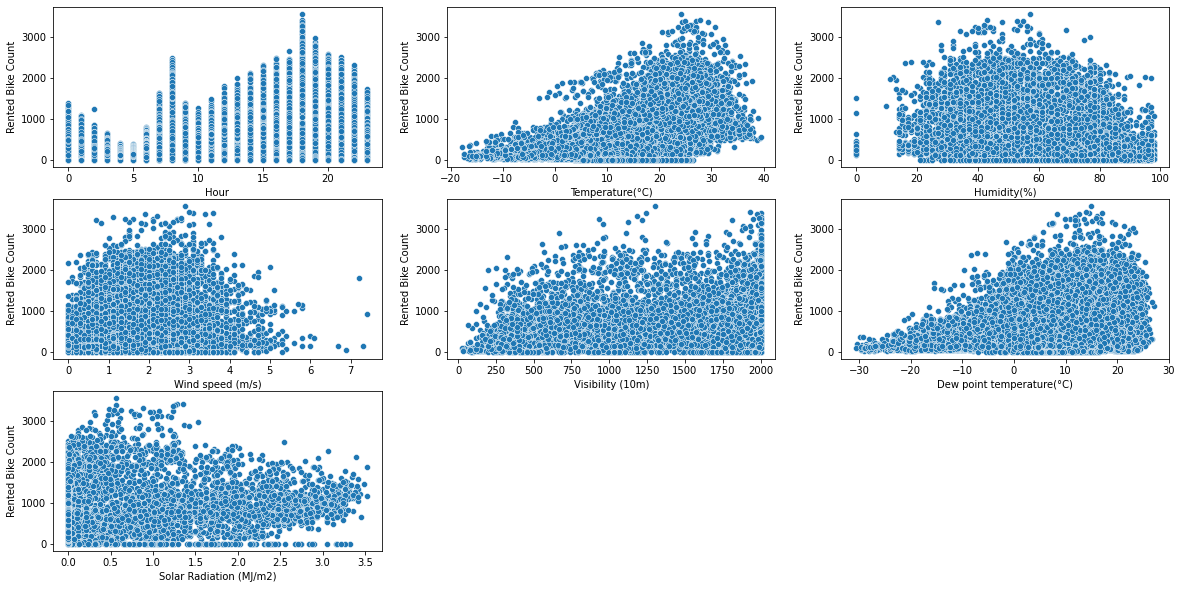

In [9]:
# creating a list of nv 
list2=[i for i in df.describe().columns.to_list() if i not in ['Snowfall (cm)','Rainfall(mm)','Rented Bike Count']]

# running a for loop over list2
plt.figure(figsize=(20,10))
for index,i in enumerate(list2):
  plt.subplot(3,3,index+1)
  sns.scatterplot(x=df[i],y=df['Rented Bike Count'])

**Observations drawn from the scatter plots:**



*  Demand for bikes is higher during morning hours and hours between 15 and 25
*  Demand is high when temperatures are high.

*  Demand is high during medium humidity.
*   Demand is high when windspeed is less and solar radiation is less.


*   Demand is high when visibility are high.



In [10]:
#assign the numerical coulmn to variable
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

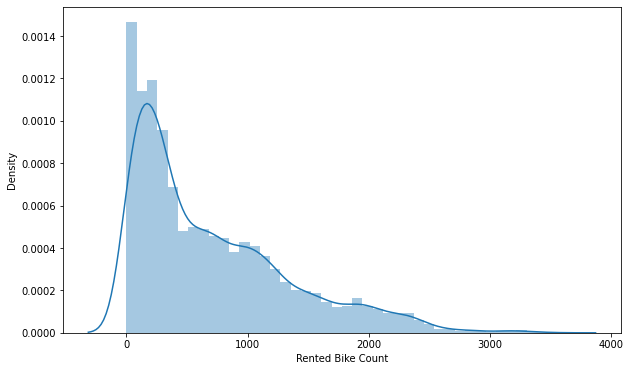

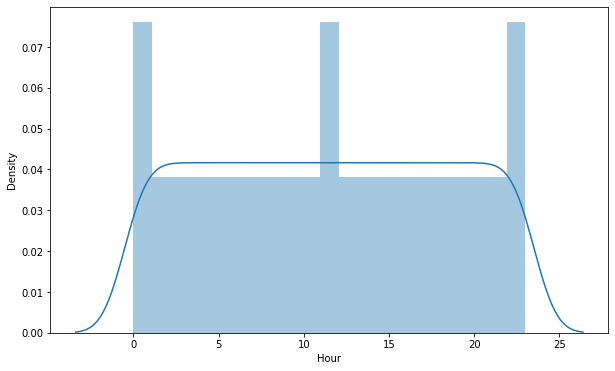

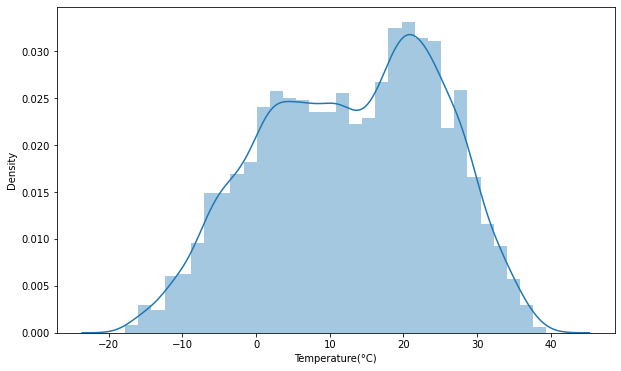

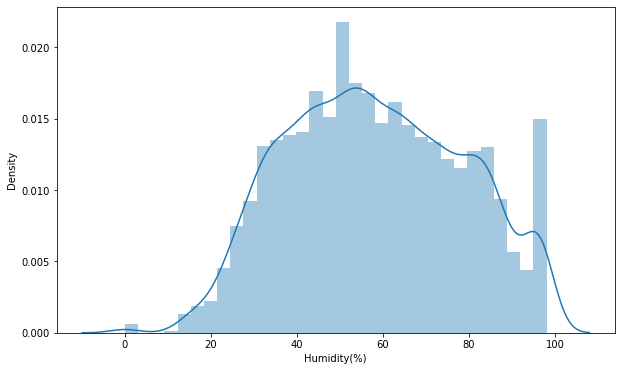

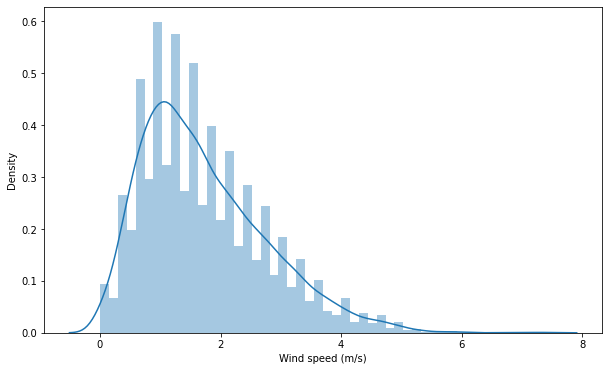

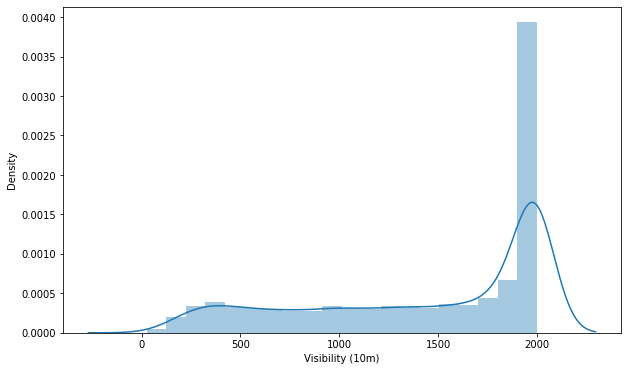

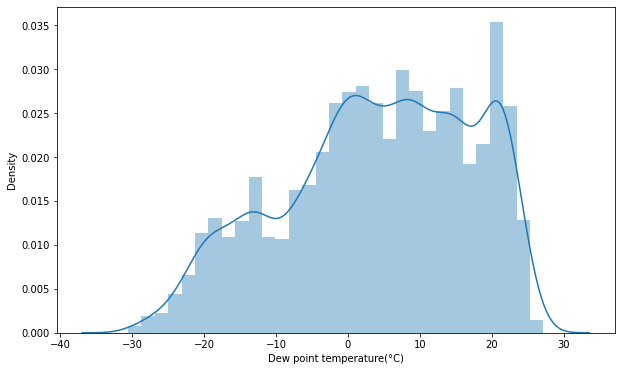

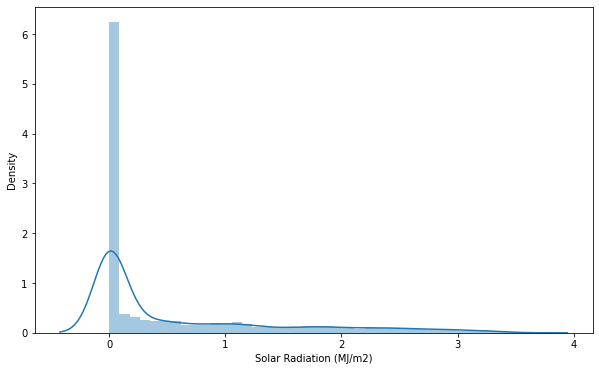

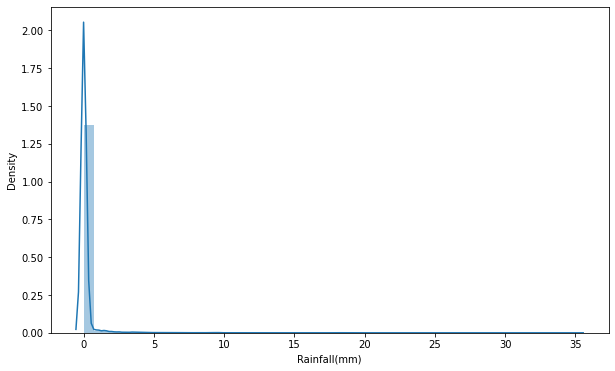

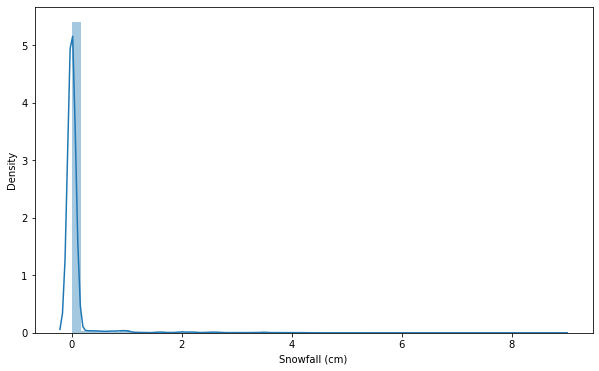

In [11]:
# displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

# **Catagorical Variables**

Text(0, 0.5, 'rented bike count mean')

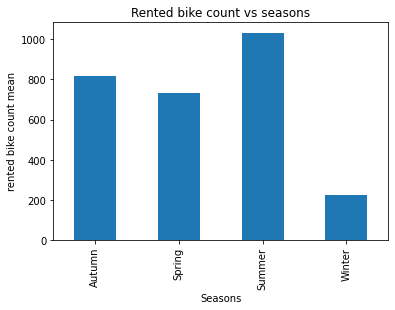

In [12]:
# checking the mean rented bike count in each seasons.
df.groupby(['Seasons'])['Rented Bike Count'].mean().plot(kind='bar')
plt.title('Rented bike count vs seasons')
plt.ylabel('rented bike count mean')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

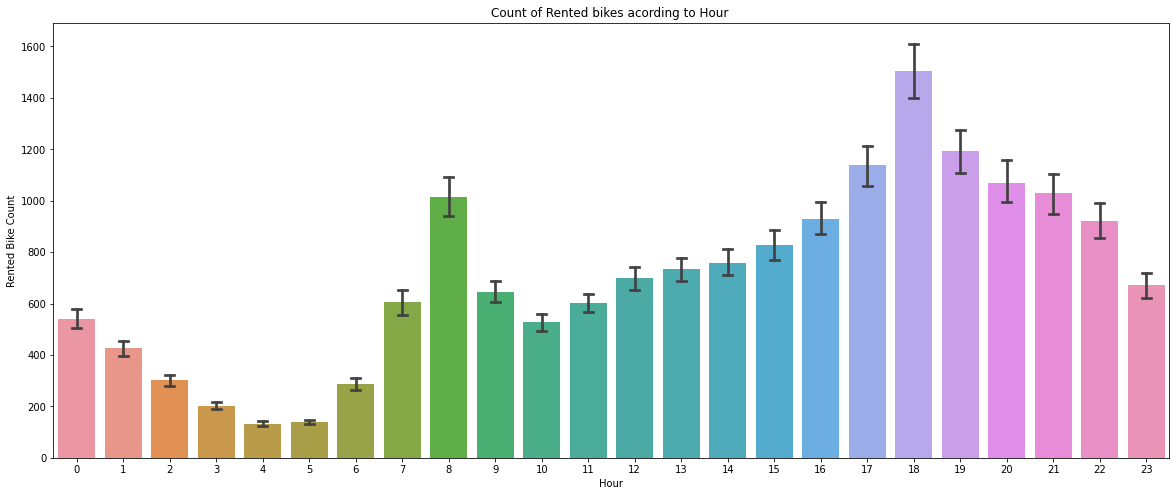

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

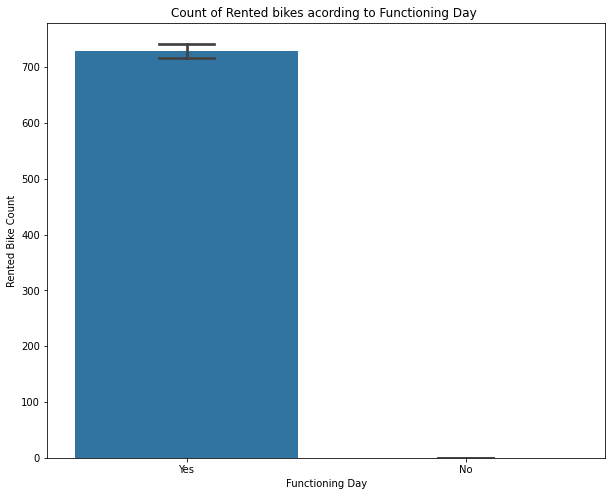

In [13]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

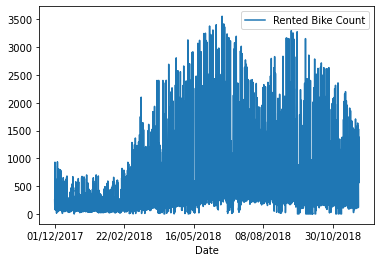

In [14]:
# In this plot high values between 22/02/2018 to 08/08/2018
df.plot(x='Date',y='Rented Bike Count',kind='line')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

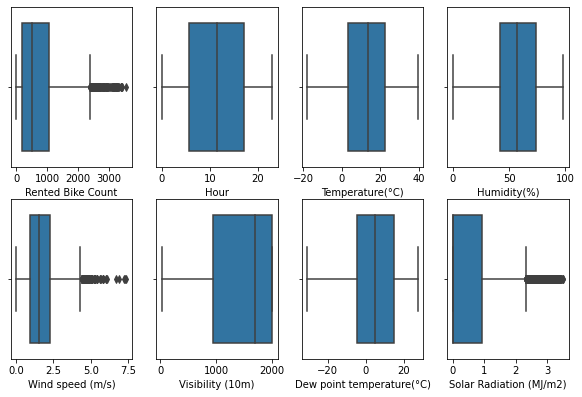

In [15]:
# running a for loop over each of the variables
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in df.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

Text(0.5, 1.0, "Boxplot of 'rented bike count'")

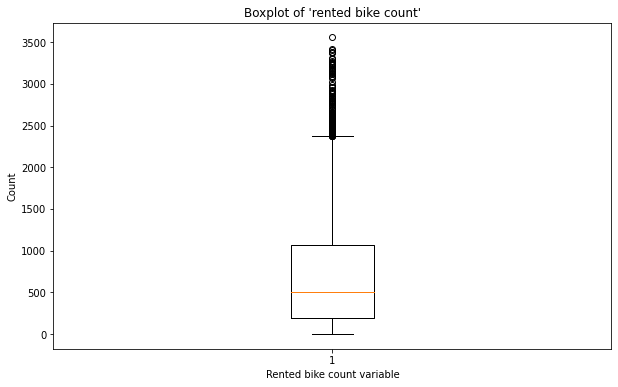

In [16]:
# checking outliers using box plot
plt.figure(figsize=(10,6))
plt.boxplot(df['Rented Bike Count'])
plt.xlabel('Rented bike count variable')
plt.ylabel('Count')
plt.title("Boxplot of 'rented bike count'")

In [17]:
## Treating outliers with the hwlp of IQR
df_RentedBikeCount=df['Rented Bike Count']
df_RentedBikeCount.describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [18]:
IQR=1065-191
upper_whisker= int(1065+1.5*IQR)
Lower_whisker= int(191-1.5*IQR)
df_without_outlier = df[Lower_whisker <= df['Rented Bike Count'] ]
df_without_outlier= df[df['Rented Bike Count'] <=upper_whisker]
df_without_outlier

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


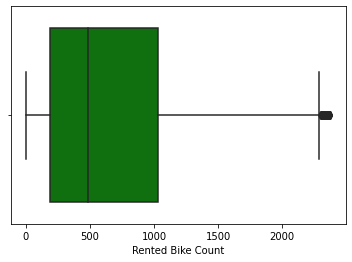

In [19]:
sns.boxplot(df_without_outlier['Rented Bike Count'],color='green')

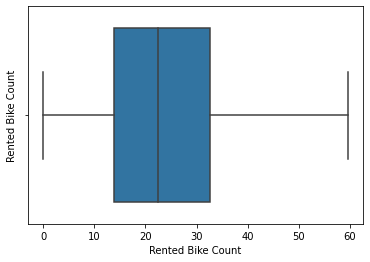

In [20]:
# Other type to remove Outliers 
# Applying sqrt on Rented Bike Count 

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))

In above boxplot have no outliers..

Text(0.5, 1.0, 'Heatmap')

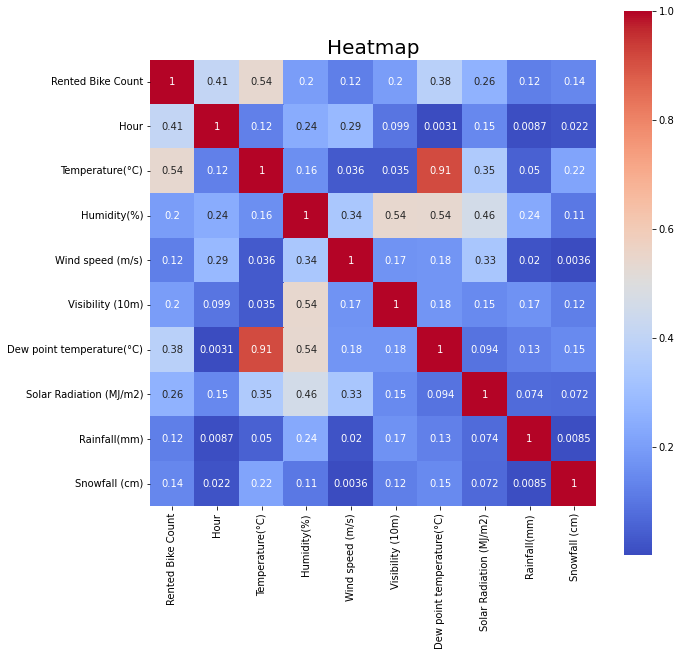

In [21]:
## finding the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm', annot=True, square=True)
plt.title('Heatmap',fontsize=(20))

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
#changing the datatype of date.
df['Date'] = pd.to_datetime(df['Date'])

df['month']=df.Date.dt.month

df['Day_name']=df.Date.dt.day_name()

df['year']=df.Date.dt.year

In [24]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_name,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017


In [25]:
df.shape

(8760, 17)

In [26]:
#  multicollinearity with the help of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["variables"] = df.columns

    return(vif)

In [28]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,VIF,variables
0,4.454430,Hour
1,188.537954,Temperature(°C)
2,186.884974,Humidity(%)
3,4.838265,Wind speed (m/s)
4,10.458051,Visibility (10m)
5,126.994440,Dew point temperature(°C)
6,2.889097,Solar Radiation (MJ/m2)
7,1.103869,Rainfall(mm)
8,1.133219,Snowfall (cm)
9,4.721494,month


In [29]:
#numrical features in our dataset
numerical_features=list(df.describe().columns)
numerical_features[1:]

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'month',
 'year']

In [30]:
df.drop(['Dew point temperature(°C)','year'], axis = 1,inplace=True)
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,VIF,variables
0,3.956097,Hour
1,3.230202,Temperature(°C)
2,6.006861,Humidity(%)
3,4.615739,Wind speed (m/s)
4,5.332471,Visibility (10m)
5,2.265399,Solar Radiation (MJ/m2)
6,1.081093,Rainfall(mm)
7,1.124563,Snowfall (cm)
8,4.577143,month


In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','Day_name']
for col in cols:
  df[col]=df[col].astype('category')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
 12  Functioning Day          8760 non-

In [32]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'month'],
      dtype='object')

In [33]:
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'Day_name'], dtype='object')

In [34]:
df_copy = df
df_copy= pd.get_dummies(df_copy, columns=['Hour'], prefix=['Hour'])

In [35]:
df_copy

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_name,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,2017-01-12,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-12,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-12,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-12,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-12,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8756,2018-11-30,764,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8757,2018-11-30,694,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8758,2018-11-30,712,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


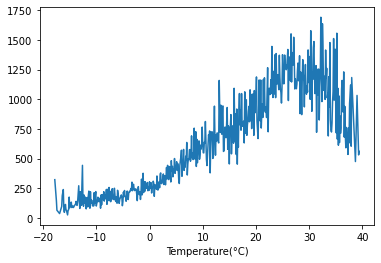

In [36]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

# **MODELING**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# **Train Test Split:-**

In [39]:
df_copy.drop(['Date'],axis=1,inplace=True)
df_copy.drop(['Seasons'],axis=1,inplace=True)
df_copy.drop(['Day_name'],axis=1,inplace=True)
df_copy.drop(['Holiday'],axis=1,inplace=True)
df_copy.drop(['Functioning Day'],axis=1,inplace=True)

In [40]:
X = df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 32)
(2190, 32)


In [43]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'month'],
      dtype='object')

In [44]:
#scaling with the help of MinMax scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train 

array([[0.375     , 0.84693878, 0.14864865, ..., 0.        , 0.        ,
        1.        ],
       [0.7306338 , 0.47959184, 0.31081081, ..., 0.        , 0.        ,
        0.        ],
       [0.18309859, 0.33673469, 0.27027027, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75704225, 0.58163265, 0.24324324, ..., 0.        , 0.        ,
        0.        ],
       [0.45422535, 0.60204082, 0.28378378, ..., 0.        , 0.        ,
        0.        ],
       [0.43309859, 0.84693878, 0.44594595, ..., 0.        , 0.        ,
        0.        ]])

# **LINEAR REGRESSION**

In [46]:
regressor= LinearRegression().fit(X_train, y_train)

In [47]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
regressor.intercept_

17884078760157.523

In [49]:
regressor.coef_

array([ 3.07649348e+01, -1.24353404e+01, -1.74135131e+00,  1.06457203e-01,
        5.47808195e+00, -5.08493863e+01, -2.16916083e+00,  2.47331399e+00,
       -1.78840788e+13, -1.78840788e+13, -1.78840788e+13, -1.78840788e+13,
       -1.78840788e+13, -1.78840788e+13, -1.78840788e+13, -1.78840788e+13,
       -1.78840788e+13, -1.78840788e+13, -1.78840788e+13, -1.78840788e+13,
       -1.78840788e+13, -1.78840788e+13, -1.78840788e+13, -1.78840788e+13,
       -1.78840788e+13, -1.78840788e+13, -1.78840788e+13, -1.78840788e+13,
       -1.78840788e+13, -1.78840788e+13, -1.78840788e+13, -1.78840788e+13])

In [50]:
y_pred_train = regressor.predict(X_train)

In [51]:
y_train

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
          ...    
4373    17.492856
7891    44.362146
4859    32.649655
3264    20.024984
2732    22.649503
Name: Rented Bike Count, Length: 6570, dtype: float64

In [52]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [53]:
#Predicted Rented Bike Count on the test data
y_pred

array([12.42578125, 21.55078125, 21.3359375 , ..., 36.453125  ,
       24.4140625 , 34.5625    ])

In [54]:
# Actual Rented Bike Count on test data
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented Bike Count, Length: 2190, dtype: float64

In [55]:
#get the X_train and X-test value
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

In [56]:
#for Train dataset
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print('MSE_lr',MSE_lr)

RMSE_lr=np.sqrt(MSE_lr)
print('RMSE_lr',RMSE_lr)

r2_lr= r2_score(y_train, y_pred_train)
print('r2_lr',r2_lr)

Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 ",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE_lr 63.80608745192521
RMSE_lr 7.987871271617064
r2_lr 0.5856496773074918
Adjusted R2  0.5795026164237829


In [57]:
# For test dataset
MSE_lr= mean_squared_error(y_test, y_pred_test)
print('MSE',MSE_lr)

RMSE_lr=np.sqrt(MSE_lr)
print("RMSE",RMSE_lr)

r2_lr= r2_score((y_test), (y_pred_test))
print('R2',r2_lr)

Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2',Adjusted_R2_lr )

MSE 71.41577426276571
RMSE 8.45078542283294
R2 0.5479052966295999
Adjusted R2 0.5411982820223431


Looks like our r2 score value is 0.73 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

Text(0.5, 0, 'Actual Values')

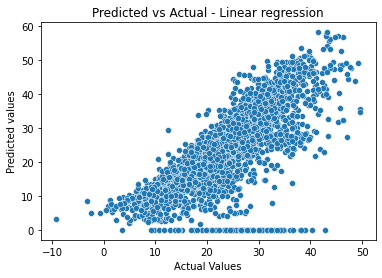

In [58]:
#visualizing the predictions
sns.scatterplot(x=y_pred,y=y_test)
plt.title('Predicted vs Actual - Linear regression')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

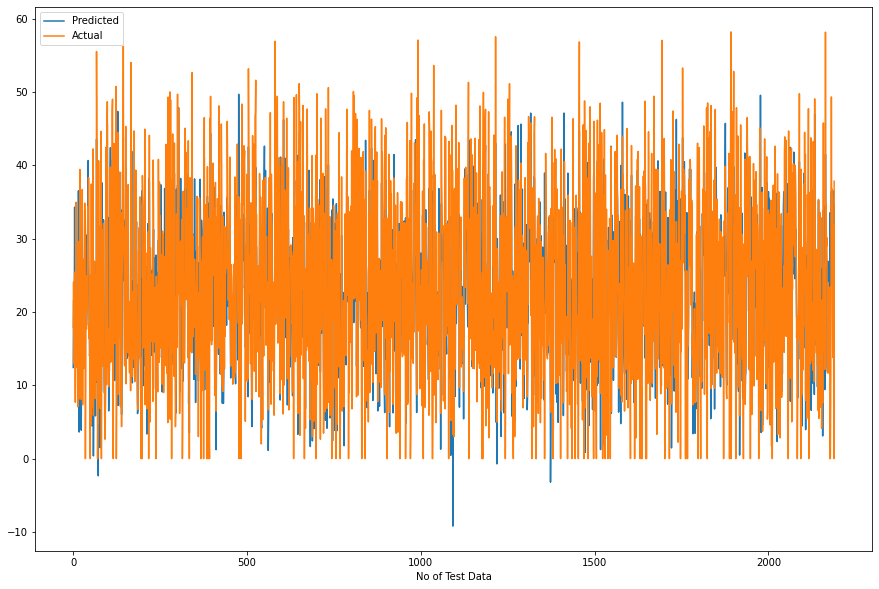

In [59]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Text(0.5, 1.0, 'Predicted values vs residuals - Heteroscedasticity(LR)')

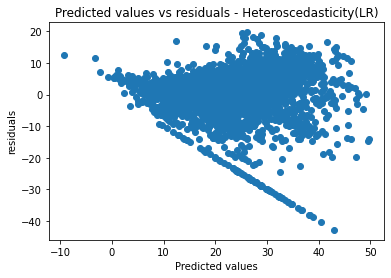

In [60]:
# checking for heteroscedasticity
plt.scatter(y_pred,y_test-y_pred)
plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.title('Predicted values vs residuals - Heteroscedasticity(LR)')

# **REGULARIZATION**

# **LASSO REGRESSION**

In [61]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [62]:
# Calculate the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [63]:
#for Train dataset
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE' ,MSE_lasso)

RMSE_lasso=np.sqrt(MSE_lasso)
print('RMSE',RMSE_lasso)

r2_lasso= r2_score(y_train, y_pred_train_lasso)
print('R2',r2_lasso)

Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 71.79096669357524
RMSE 8.472955015434417
R2 0.5337966735806732
Adjusted R2 0.5795026164237829


In [64]:
# For test dataset
MSE_lasso= mean_squared_error(y_test, y_pred_test_lasso)
print('MSE',MSE_lasso)

RMSE_lasso=np.sqrt(MSE_lasso)
print('RMSE',RMSE_lasso)

r2_lasso= r2_score((y_test), (y_pred_test_lasso))
print('R2',r2_lasso)

Adjusted_R2_lasso = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2',Adjusted_R2_lasso )

MSE 78.07926391090729
RMSE 8.836247162167165
R2 0.5057223418554337
Adjusted R2 0.5411982820223431


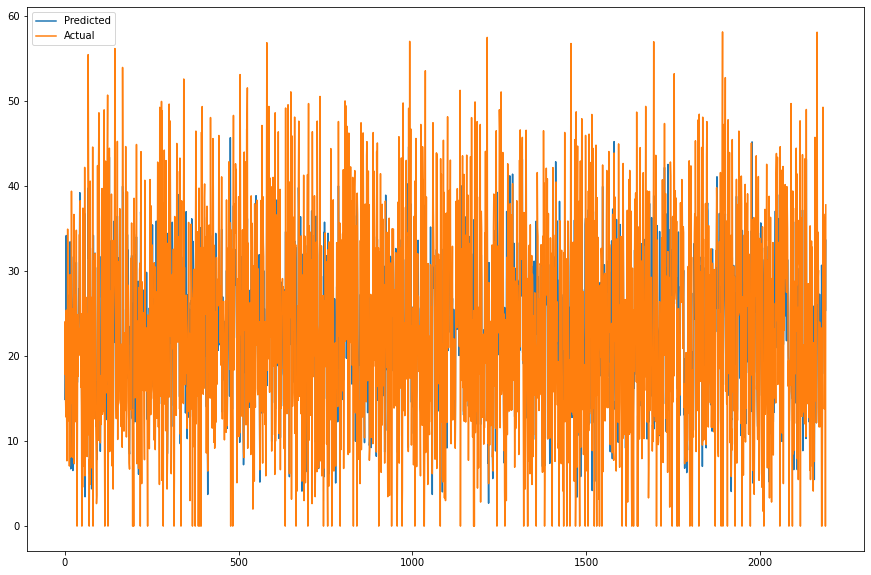

In [65]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

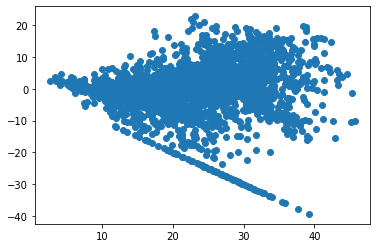

In [66]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

### **LASSO REGRESSION WITH GRIDSEARCHCV**

In [67]:
### Cross validation
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+04, tolerance: 6.797e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 6.730e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [68]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -64.30596921632464


In [70]:
y_pred_test_lasso_grid = lasso_regressor.predict(X_test)
y_pred_train_lasso_grid = lasso_regressor.predict(X_train)

In [71]:
#for Train dataset
MSE_lg= mean_squared_error((y_train), (y_pred_train_lasso_grid ))
print('MSE',MSE_lg)

RMSE_lg=np.sqrt(MSE_lg)
print('RMSE',RMSE_lg)

r2_lg= r2_score(y_train, y_pred_train_lasso_grid )
print('R2',r2_lg)

Adjusted_R2_lg = (1-(1-r2_score(y_train, y_pred_train_lasso_grid ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_train_lasso_grid ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 63.80635783034839
RMSE 7.987888195909378
R2 0.5856479214971708
Adjusted R2 0.579500834565279


In [72]:
#for Test dataset
MSE_lg  = mean_squared_error((y_test), (y_pred_test_lasso_grid))
print('MSE' , MSE_lg)

RMSE_lg = np.sqrt(MSE_lg)
print('RMSE' ,RMSE_lg)

r2_lg= r2_score((y_test), (y_pred_test_lasso_grid))
print('R2' ,r2_lg)

print('Adjusted R2',1-(1-r2_score((y_test),(y_pred_test_lasso_grid)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE 71.4061086616816
RMSE 8.450213527579146
R2 0.5479664843307783
Adjusted R2 0.5412603774687408


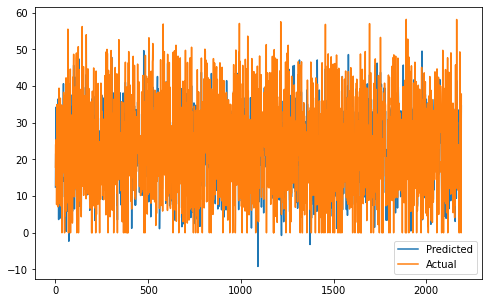

In [73]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_lasso_grid))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

In [74]:
ridge  = Ridge(alpha=0.1)

In [75]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [76]:
ridge.score(X_train, y_train)

0.5856443115236643

In [77]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [78]:
#for Train dataset
MSE_rg= mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE',MSE_rg)

RMSE_rg=np.sqrt(MSE_rg)
print('RMSE',RMSE_rg)

r2_rg= r2_score(y_train, y_pred_train_ridge)
print('R2',r2_rg)

Adjusted_R2_rg = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 63.806913732619115
RMSE 7.987922992406669
R2 0.5856443115236643
Adjusted R2 0.5795026164237829


In [79]:
#For Test Dataset
MSE_rg = mean_squared_error(y_test,y_pred_test_ridge)
print('MSE' , MSE_rg)
    
RMSE_rg = np.sqrt(MSE_rg)
print('RMSE' ,RMSE_rg)

r2_rg = r2_score(y_test,y_pred_test_ridge)
print('R2' ,r2_rg)

adj_r2=1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2',adj_r2)

MSE 71.42201582406284
RMSE 8.451154703593044
R2 0.5478657846753807
Adjusted R2 0.5411581838917053


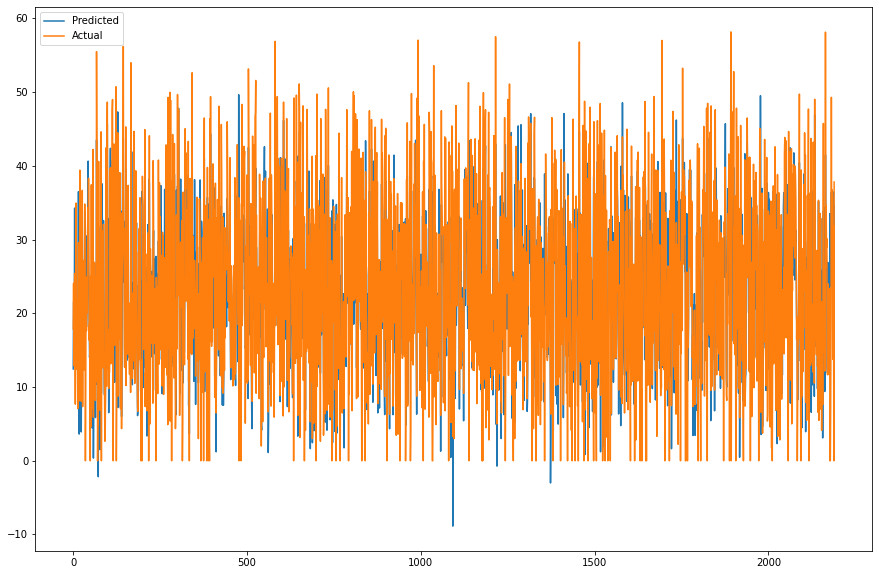

In [80]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_ridge))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

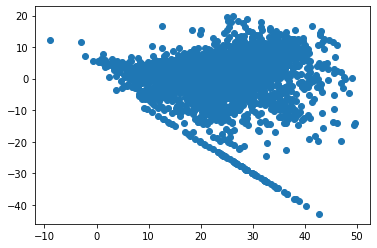

In [81]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test-y_pred_test_ridge))

# **RIDGE REGRESSION WITH GRIDSEARCHCV**

In [82]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.88363e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.33234e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [83]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -64.30626149514787


In [84]:
#Model Prediction
y_pred_test_ridge_gridsearchcv = ridge_regressor.predict(X_test)
y_pred_train_ridge_gridsearchcv = ridge_regressor.predict(X_train)

In [85]:
#For Train Dataset
MSE_rg= mean_squared_error((y_train), y_pred_train_ridge_gridsearchcv )
print('MSE',MSE_rg)

RMSE_rg=np.sqrt(MSE_rg)
print('RMSE',RMSE_rg)

r2_rg = r2_score(y_train,y_pred_train_ridge_gridsearchcv)
print('R2' ,r2_rg)

Adjusted_R2_rg = (1-(1-r2_score(y_train, y_pred_train_ridge_gridsearchcv ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,y_pred_train_ridge_gridsearchcv ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 63.80634129247058
RMSE 7.987887160724704
R2 0.5856480288924881
Adjusted R2 0.579500943553851


In [86]:
#For Test Dataset
MSE_rg  = mean_squared_error((y_test),(y_pred_test_ridge_gridsearchcv))
print('MSE' , MSE_rg)

RMSE_rg = np.sqrt(MSE_rg)
print('RMSE' ,RMSE_rg)

r2 = r2_score((y_test), (y_pred_test_ridge_gridsearchcv))
print('R2',r2)

Adjusted_R2_rg = (1-(1-r2_score((y_test), (y_pred_test_ridge_gridsearchcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))) )
print('Adjusted R2',1-(1-r2_score((y_test), (y_pred_test_ridge_gridsearchcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE 71.40851747932253
RMSE 8.450356056363692
R2 0.5479512354070204
Adjusted R2 0.541244902320801


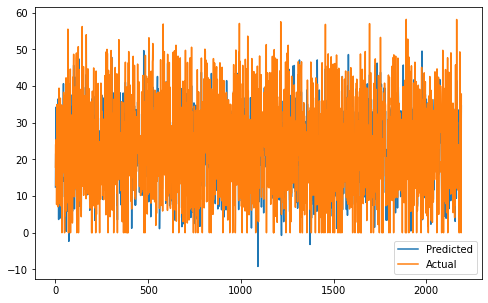

In [87]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge_gridsearchcv))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

In [88]:
decision_tree_regressor= DecisionTreeRegressor(criterion='mse', random_state=100, max_depth=4, min_samples_leaf=1)

In [89]:
decision_tree_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4, random_state=100)

In [90]:
y_pred_decisiont_test = decision_tree_regressor.predict(X_test)

In [91]:
y_pred_decisiont_train = decision_tree_regressor.predict(X_train)

In [92]:
#For Train Dataset
MSE_dt= mean_squared_error((y_train), (y_pred_decisiont_train))
print('MSE',MSE_dt)

RMSE_dt=np.sqrt(MSE_dt)
print('RMSE',RMSE_dt)

r2_dt= r2_score(y_train, y_pred_decisiont_train)
print('R2',r2_dt)

Adjusted_R2_dt = (1-(1-r2_score(y_train, y_pred_decisiont_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_decisiont_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 78.60745084917293
RMSE 8.866084301943724
R2 0.4895311101792448
Adjusted R2 0.4819580900242776


In [93]:
#For Test Dataset
MSE_dt = mean_squared_error((y_test),(y_pred_decisiont_test))
print('MSE' , MSE_dt)

RMSE_dt = np.sqrt(MSE_dt)
print('RMSE' ,RMSE_dt)

r2_dt = r2_score((y_test), (y_pred_decisiont_test))
print('R2',r2_dt)

Adjusted_R2_dt = (1-(1-r2_score(y_test, y_pred_decisiont_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',(1-(1-r2_score((y_test), (y_pred_decisiont_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 92.01232721219198
RMSE 9.592305625457936
R2 0.41751964174805034
Adjusted R2 0.40887830124547164


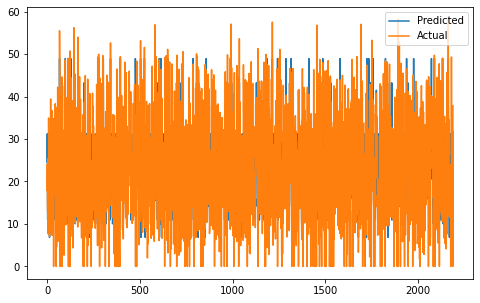

In [94]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_decisiont_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
random_forest = RandomForestRegressor(n_estimators=70, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=70, random_state=0)

In [121]:
y_pred_random_forest_test = random_forest.predict(X_test)

In [122]:
y_pred_random_forest_train = random_forest.predict(X_train)

In [123]:
#For Train Dataset
MSE_rf= mean_squared_error((y_train), (y_pred_random_forest_train))
print('MSE',MSE_rf)

RMSE_rf=np.sqrt(MSE_rf)
print('RMSE',RMSE_rf)

r2_rf= r2_score(y_train, y_pred_random_forest_train)
print('R2',r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_random_forest_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,y_pred_random_forest_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 6.032823863872621
RMSE 2.4561807473947477
R2 0.9608234478156008
Adjusted R2 0.9602422472268661


In [124]:
#For Test Dataset
MSE_rf = mean_squared_error((y_test),(y_pred_random_forest_test))
print('MSE' , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print('RMSE' ,RMSE_rf)

r2_rf = r2_score((y_test), (y_pred_random_forest_test))
print('R2',r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_test, y_pred_random_forest_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',(1-(1-r2_score((y_test), (y_pred_random_forest_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 50.54123326404899
RMSE 7.1092357721522355
R2 0.6800507437416734
Adjusted R2 0.6753041622858243


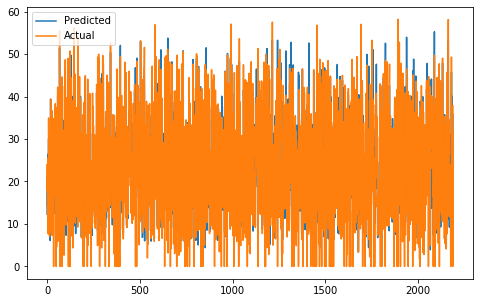

In [125]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_random_forest_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST WITH GRIDSEARCHCV**

In [126]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [127]:
# predicting for both train and test
y_pred_random_gridsearchcv_train=grid_search.predict(X_train)
y_pred_random_gridsearchcv_test=grid_search.predict(X_test)

In [128]:
#For Train Dataset
MSE_rf= mean_squared_error((y_train), (y_pred_random_gridsearchcv_train))
print('MSE',MSE_rf)

RMSE_rf=np.sqrt(MSE_rf)
print('RMSE',RMSE_rf)

r2_rf= r2_score(y_train, y_pred_random_gridsearchcv_train)
print('R2',r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_train,  y_pred_random_gridsearchcv_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,  y_pred_random_gridsearchcv_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 33.19585904335423
RMSE 5.761584768390918
R2 0.7844294258438531
Adjusted R2 0.7812313459305491


In [129]:
#For Test Dataset
MSE_rf = mean_squared_error((y_test),(y_pred_random_gridsearchcv_test))
print('MSE', MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print('RMSE' ,RMSE_rf)

r2_rf= r2_score((y_test), (y_pred_random_gridsearchcv_test))
print('R2' ,r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_test,  y_pred_random_gridsearchcv_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_random_gridsearchcv_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 57.05977460965852
RMSE 7.553792068203792
R2 0.6387853784008468
Adjusted R2 :  0.6334266079366961


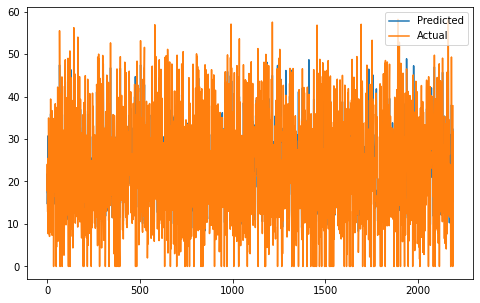

In [130]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_random_gridsearchcv_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **XGBOOST**

In [131]:
import xgboost as xg
from xgboost import XGBRegressor
from xgboost import XGBClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [132]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 1000, seed = 123)

In [133]:
# Fitting the model
xgb_r.fit(X_train, y_train)

[04:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000, seed=123)

In [134]:
# Predict the model
y_pred_xgb_train = xgb_r.predict(X_train)
y_pred_xgb_test = xgb_r.predict(X_test)

In [135]:
#For Train Dataset
MSE_xgb= mean_squared_error((y_train), (y_pred_xgb_train))
print('MSE',MSE_xgb)

RMSE_xgb=np.sqrt(MSE_xgb)
print('RMSE',RMSE_xgb)

r2_xgb= r2_score(y_train, y_pred_xgb_train)
print('R2',r2_xgb)

Adjusted_R2_xgb = (1-(1-r2_score(y_train,  y_pred_xgb_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,  y_pred_xgb_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 24.18281700131706
RMSE 4.917602769776861
R2 0.8429592155190632
Adjusted R2 0.8406294495925959


In [136]:
#For Test Dataset
MSE_xgb = mean_squared_error((y_test),(y_pred_xgb_test))
print('MSE' , MSE_xgb)

RMSE_xgb = np.sqrt(MSE_xgb)
print('RMSE' ,RMSE_xgb)

r2_xgb= r2_score((y_test), (y_pred_xgb_test))
print('R2' ,r2_xgb)

Adjusted_R2_xgb = (1-(1-r2_score(y_test,  y_pred_xgb_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',(1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 49.721140237948546
RMSE 7.051321878764899
R2 0.6852423098515198
Adjusted R2 0.6805727474571056


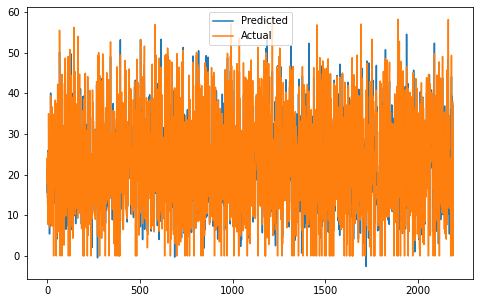

In [137]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_xgb_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [138]:
from sklearn.linear_model import ElasticNet

In [139]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [140]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [141]:
elasticnet.score(X_train, y_train)

0.40114227491180954

In [142]:
y_pred_en = elasticnet.predict(X_test)

In [143]:
MSE  = mean_squared_error((y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.648065396070779e+67
RMSE : 9.299497511194236e+33
R2 : 0.3782620753182029
Adjusted R2 :  -5.555841551617928e+65
